# Explore here

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from pickle import dump






In [2]:
data  = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [5]:
data.isnull().sum() # 

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [31]:
# They're no missing values or NaNs.

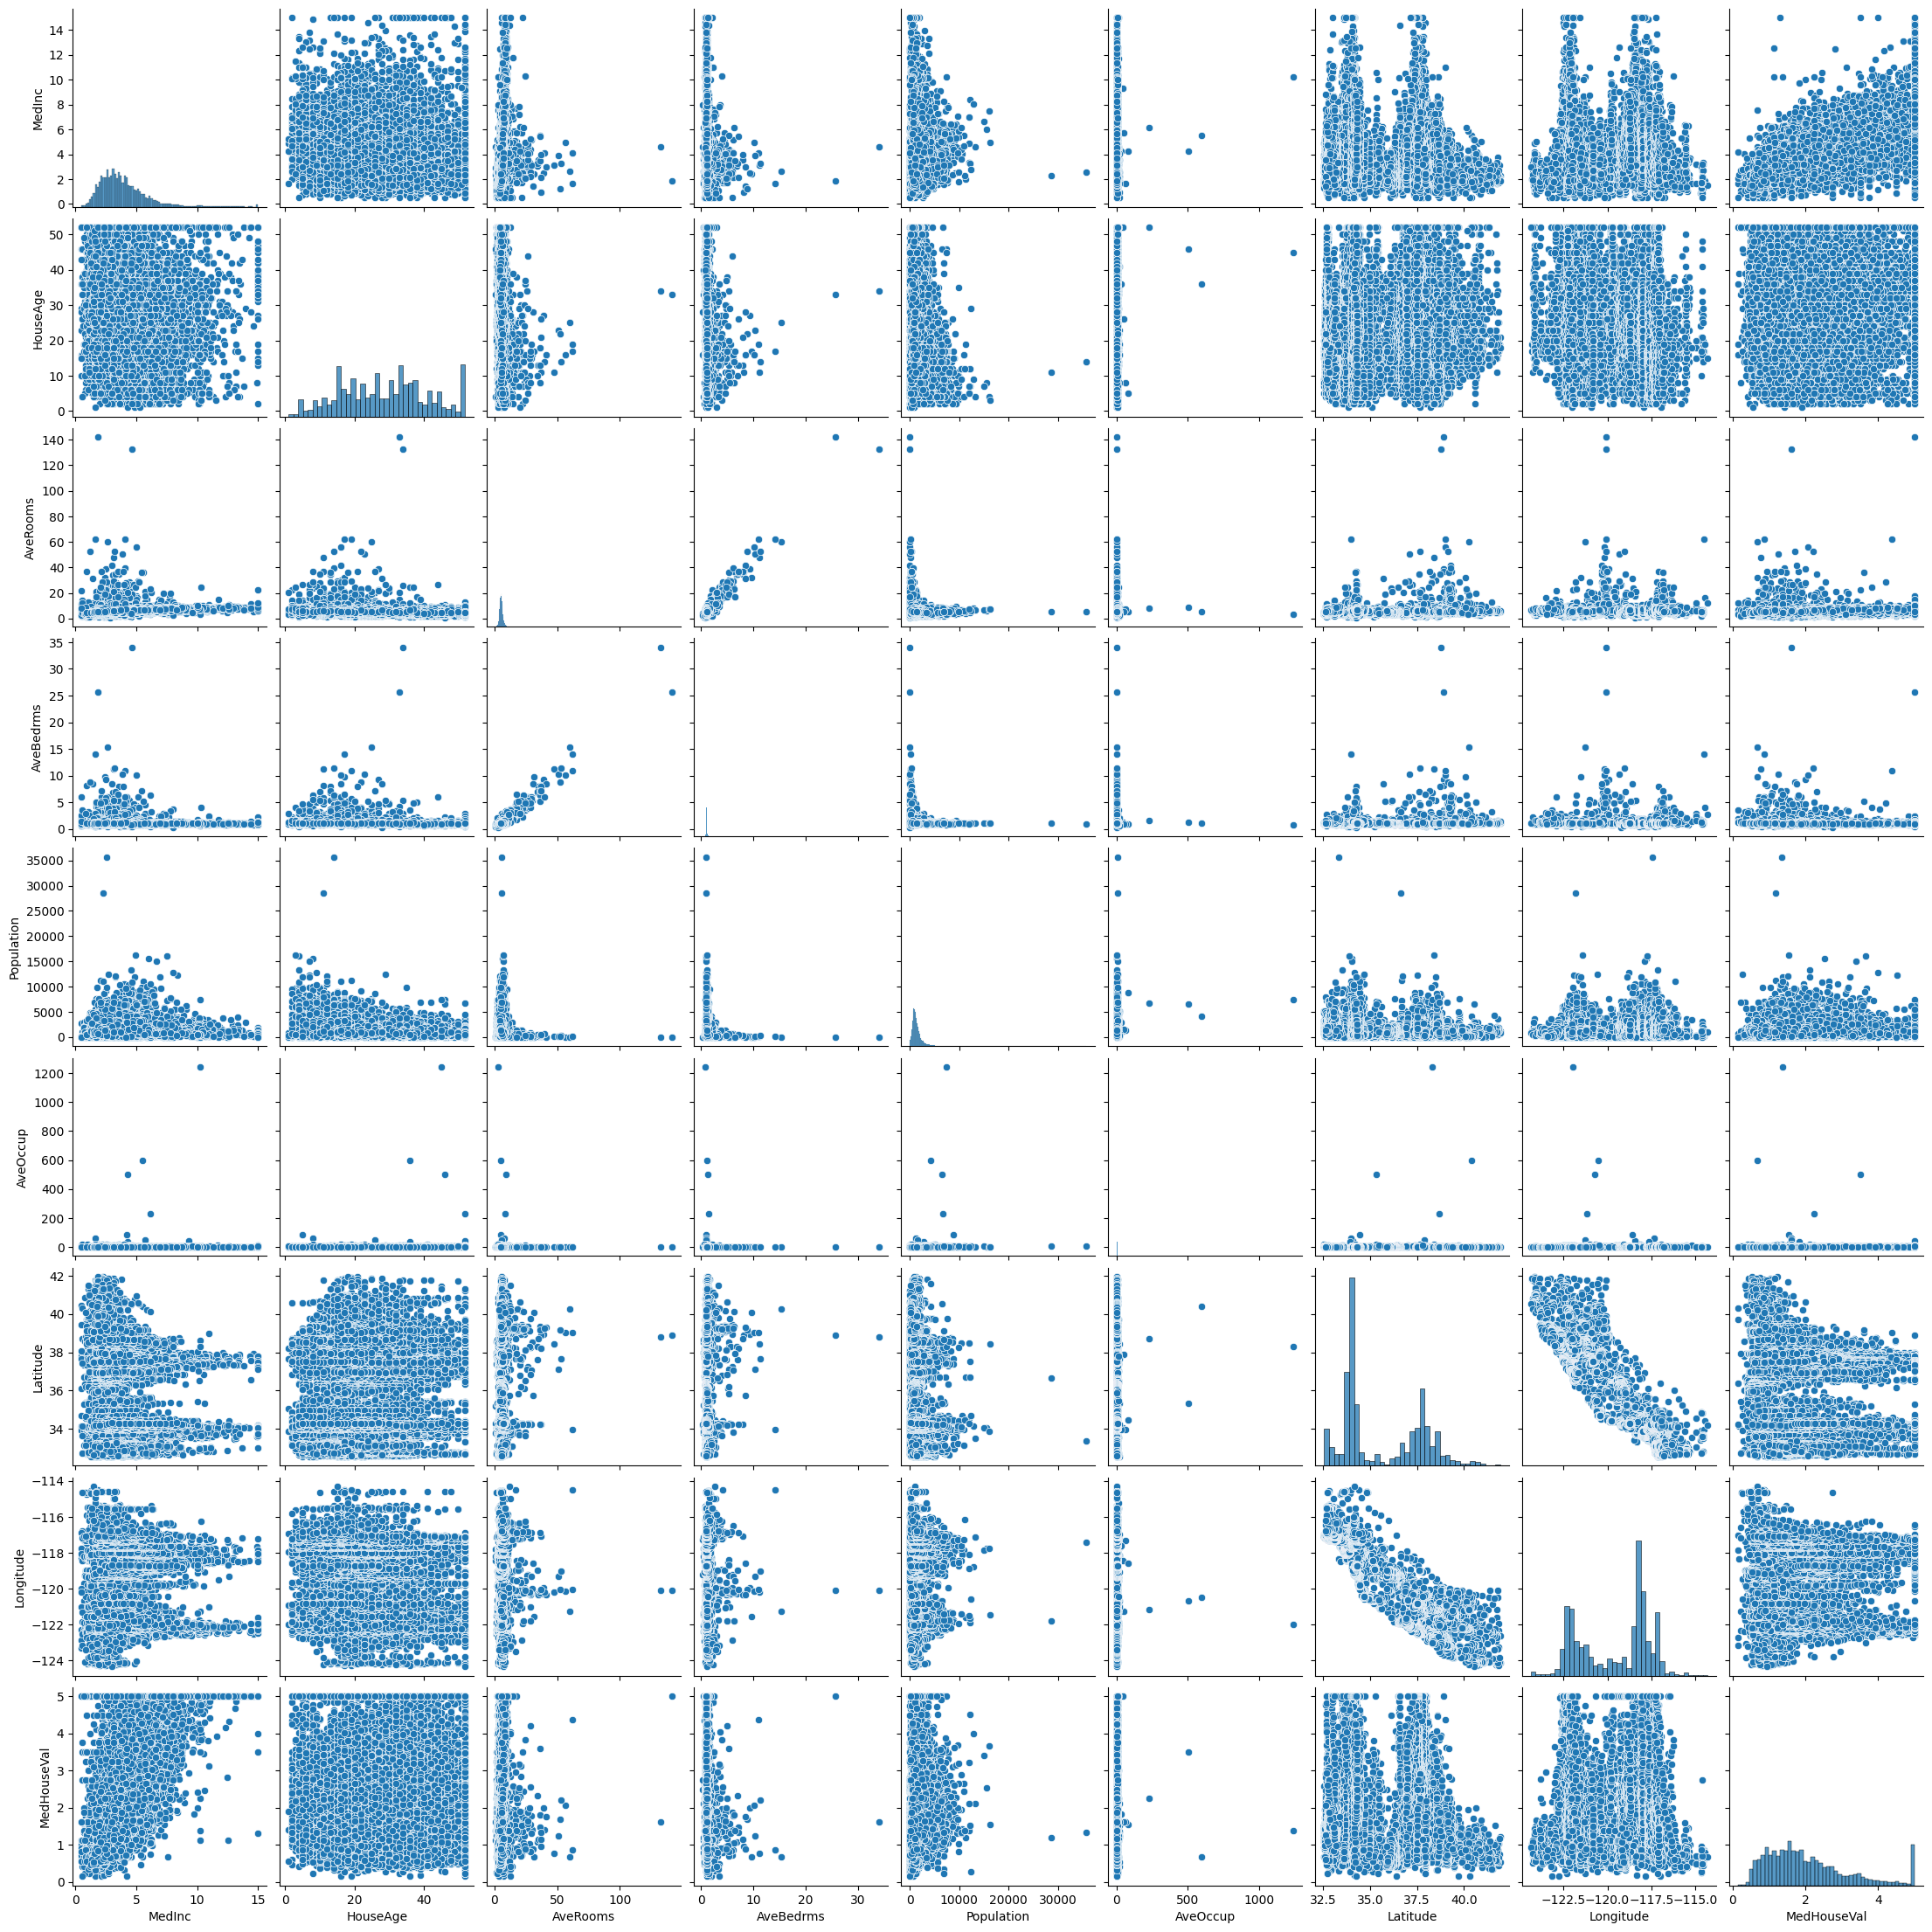

In [6]:
sns.pairplot(data)

In [7]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<Axes: >

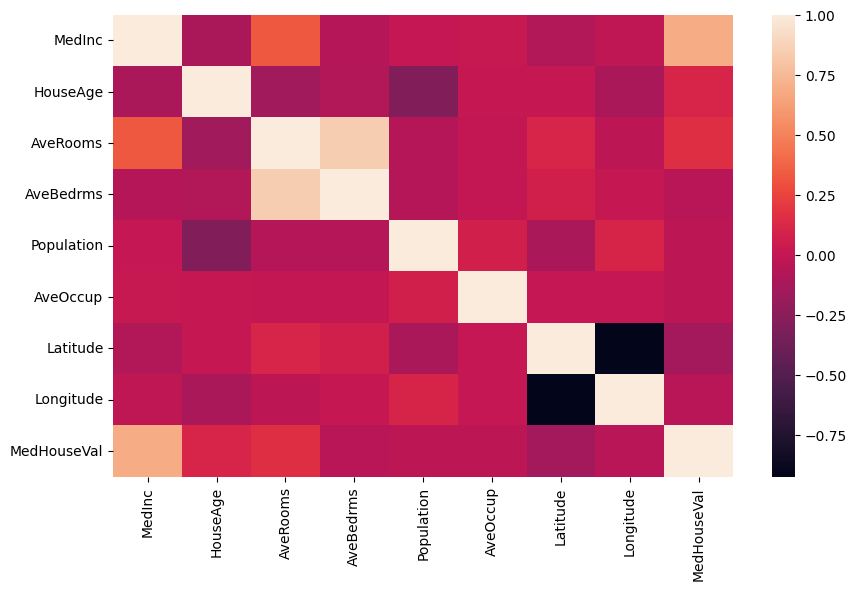

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

<Axes: xlabel='Longitude', ylabel='Latitude'>

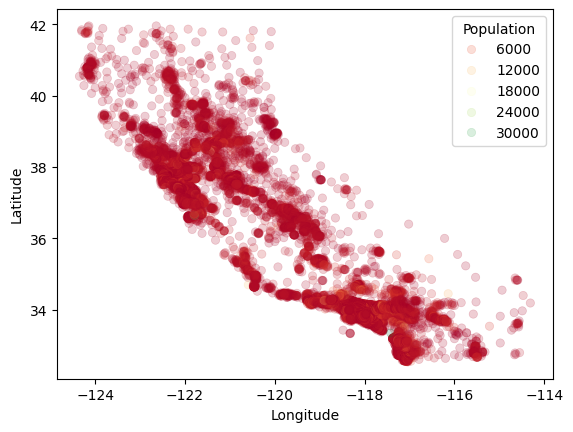

In [7]:
sns.scatterplot(x='Longitude',y='Latitude',data=data,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue = 'Population')

In [36]:
#The plot above is the density popuation of the map of california.

In [8]:
len(data['Population'].unique()),len(data['Population'])

(3888, 20640)

<Axes: xlabel='Longitude', ylabel='Latitude'>

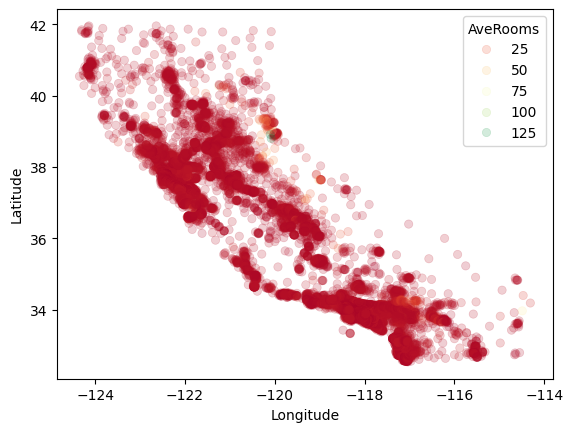

In [38]:
sns.scatterplot(x='Longitude',y='Latitude',data=data,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue = 'AveRooms')

<Axes: xlabel='Population', ylabel='AveRooms'>

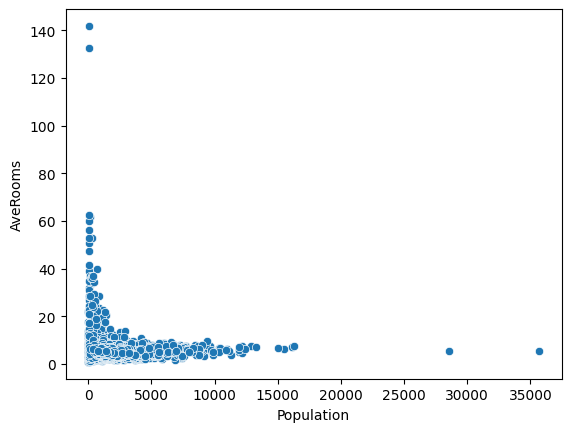

In [9]:
sns.scatterplot(x='Population',y='AveRooms',data=data)

<Axes: xlabel='Longitude', ylabel='Latitude'>

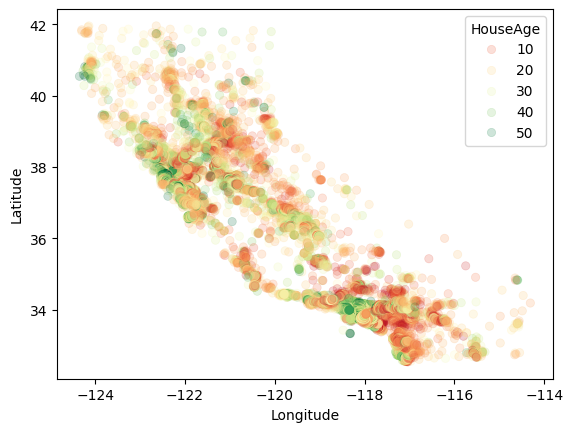

In [40]:
sns.scatterplot(x='Longitude',y='Latitude',data=data,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue = 'HouseAge')

In [41]:
# In the above plot we can see where some of the 
# Newer and older houses are located

In [8]:
df = data[['Latitude','Longitude','MedInc']]

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6,random_state =42,n_init='auto')
model.fit(df)


KMeans(n_clusters=6, random_state=42)

In [11]:
model2 = KMeans(n_clusters = 6,random_state =42,n_init='auto')
model2.fit(df)

KMeans(n_clusters=6, random_state=42)

In [12]:
#Insert Clusters to train dataset
y = list(model2.labels_)
df['clusters'] = y
df.head()


/tmp/ipykernel_8880/1708981659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = y


,Latitude,Longitude,MedInc,clusters
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,1


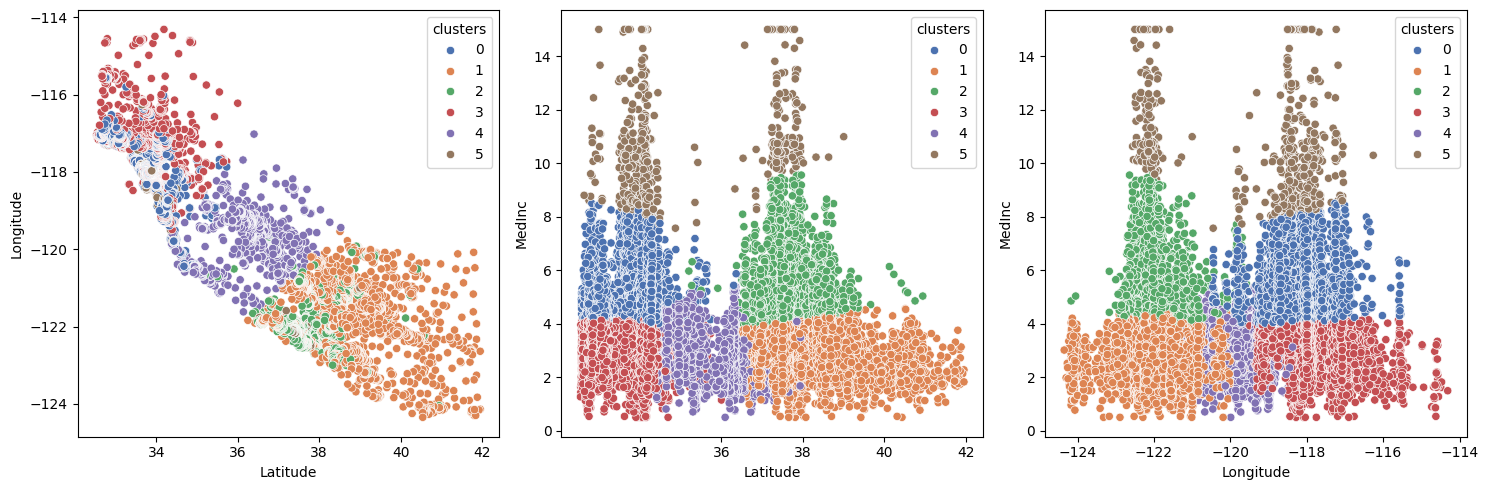

In [13]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = df, x = "Latitude", y = "Longitude", hue = "clusters", palette = "deep")
sns.scatterplot(ax = axis[1], data = df, x = "Latitude", y = "MedInc", hue = "clusters", palette = "deep")
sns.scatterplot(ax = axis[2], data = df, x = "Longitude", y = "MedInc", hue = "clusters", palette = "deep")
plt.tight_layout()

plt.show()


In [15]:
X = df.drop('clusters',axis=1)
y = df['clusters']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=.8)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state = 42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

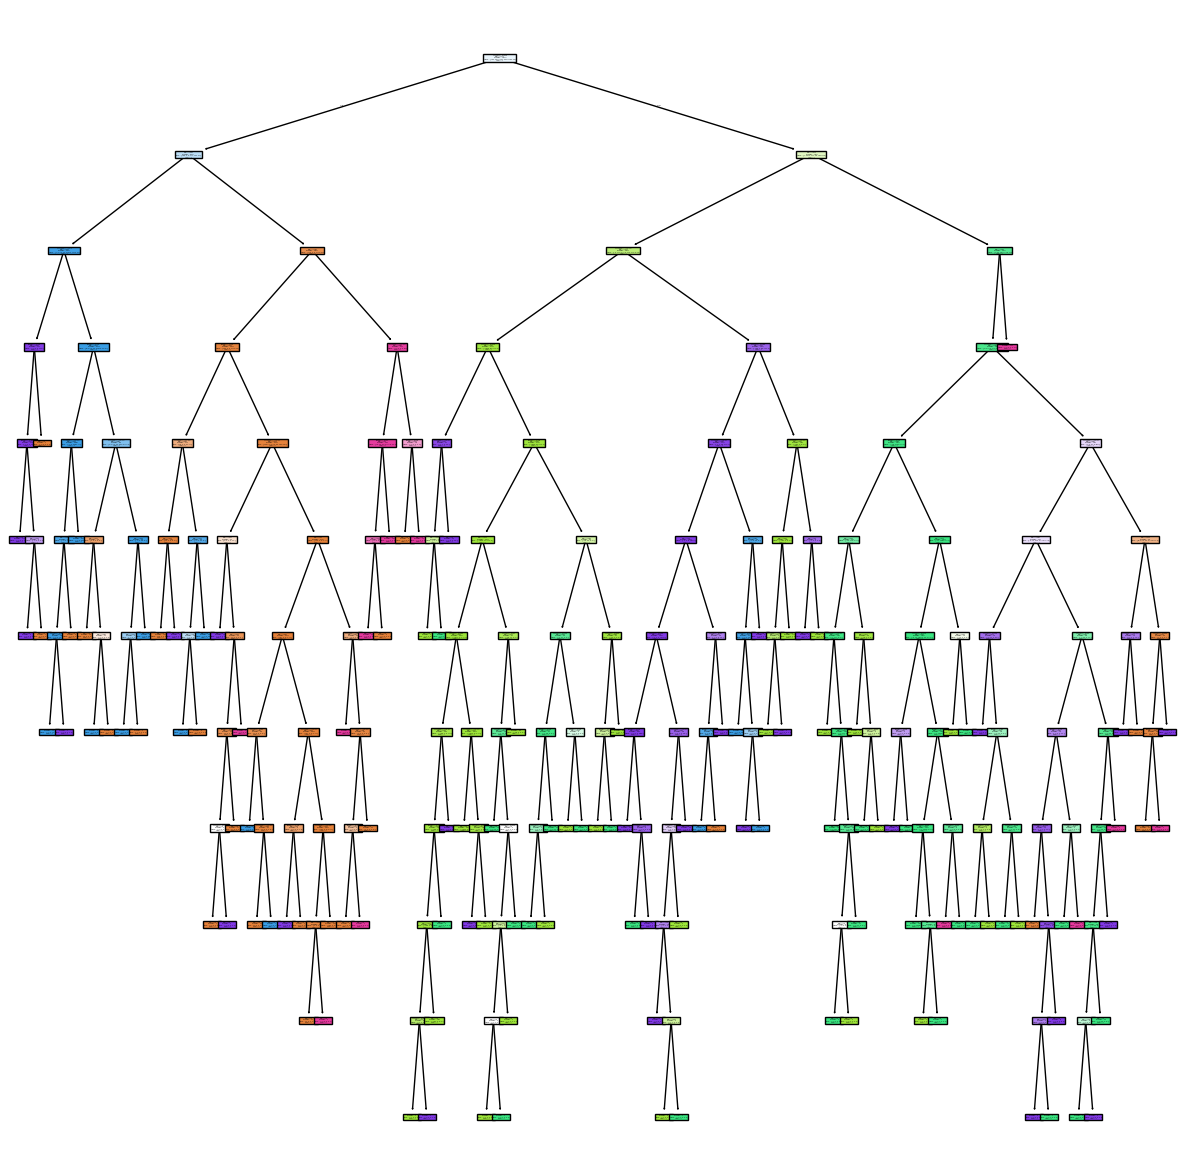

In [17]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [18]:
y_p = model1.predict(X_test)
y_p

array([4, 4, 1, ..., 2, 4, 3], shape=(4128,), dtype=int32)

In [19]:
accuracy_score(y_p,y_test) # The model is near perfect

0.9941860465116279

In [21]:
dump(model2, open("model2", "wb"))
dump(model, open("model", "wb"))